In [1]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

In [2]:
inpath = '/Users/yanmemgxing/Nutstore Files/scientific group/'

In [3]:
group_info = pd.read_csv('groupinfo(G1 mentor).csv')

In [4]:
group_info.columns

Index(['work_id', 'author_position', 'author_id', 'institution_id',
       'publication_year', 'first_pub_year', 'scientific_age', 'group_size',
       'mentor_id', 'current_year', 'ratio_institution',
       'current_scientific_age', 'mentor_first_pub_year',
       'mentor_scientific_age', 'mentor_current_scientific_age', 'end_year',
       'career_len', 'average_group_size'],
      dtype='object')

In [5]:
group_info.sample(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age,mentor_first_pub_year,mentor_scientific_age,mentor_current_scientific_age,end_year,career_len,average_group_size
3004285,W2923630938,middle,A2588916535,I172675005,2019,2011,8,4,A2294815351,2020,0.983193,9,1977,42,43,2012.0,11.0,7.0
3795739,W2323749881,middle,A2125618616,I103635307,2010,2008,2,19,A2093919058,2012,0.810219,4,1997,13,15,2010.0,12.0,19.0
4415744,W2165125585,middle,A2587207960,I1292894508,1999,1990,9,6,A2016215421,2000,0.738095,10,1959,40,41,1993.0,24.0,8.0
1797449,W3109409025,first,A2152671537,I51556381,2021,2012,9,18,A2345772009,2022,0.974790,10,1995,26,27,NaN,NaN,NaN
2008532,W1965436683,middle,A2229488790,I130701444,2015,2013,2,23,A64203156,2015,0.958333,2,1996,19,19,2013.0,7.0,26.0


In [6]:
len(group_info)

4454614

In [7]:
group_info_0 = group_info[(group_info.end_year>=1980)&(group_info.end_year<=2015)]
len(group_info_0)

3361879

In [8]:
group_size = group_info_0[['author_id','average_group_size','end_year']].drop_duplicates()

In [9]:
group_size.head(5)

,author_id,average_group_size,end_year
0,A1973568665,10.0,1992.0
72,A2066475195,5.0,1996.0
73,A2662327865,6.0,1996.0
74,A2689291091,6.0,1996.0
95,A2333535359,9.0,2000.0


##### quantiles of group size

In [14]:
Years = [1980,1985,1990,1995,2000,2005,2010]
window = 5
for year_i in Years:
    data_i = list(group_size['average_group_size'][(group_size.end_year>=year_i)&(group_size.end_year<year_i+window)])
    q25 = np.quantile(data_i,0.25)
    q50 = np.quantile(data_i,0.50)
    q75 = np.quantile(data_i,0.75)
    
    print('year',year_i,q25,q50,q75,'\n')

year 1980 5.0 8.0 15.0 

year 1985 5.0 11.0 20.0 

year 1990 6.0 12.0 23.0 

year 1995 7.0 13.0 25.0 

year 2000 7.0 14.0 26.0 

year 2005 8.0 16.0 29.0 

year 2010 9.0 17.0 31.0 



##### done

In [10]:
yearly_average_group_size = group_size.groupby('end_year')['average_group_size'].mean().reset_index(name='yearly_average_group_size')

In [11]:
yearly_average_group_size.head(5)

,end_year,yearly_average_group_size
0,1980.0,10.281553
1,1981.0,11.190930
2,1982.0,10.693281
3,1983.0,12.371875
4,1984.0,11.090383


##### 3_years_window data

In [17]:
group_info = pd.read_csv('groupinfo(G1 mentor 3_years_window).csv')
group_info_0 = group_info[(group_info.end_year>=1980)&(group_info.end_year<=2015)]
# len(group_info_0)
group_size = group_info_0[['author_id','average_group_size','end_year']].drop_duplicates()
yearly_average_group_size_3years = group_size.groupby('end_year')['average_group_size'].mean().reset_index(name='yearly_average_group_size')

##### done

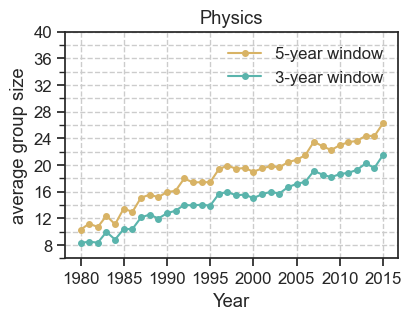

In [24]:
sns.set(style='ticks', font_scale=1.1, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])
x = list(yearly_average_group_size.end_year)
y = yearly_average_group_size.yearly_average_group_size
# y = yearly_average_group_size.yearly_average_group_size.rolling(2).mean()
ax.plot(x,y,marker='.',ms='8',label='5-year window',color='#d8b365')

x_3years = list(yearly_average_group_size_3years .end_year)
y_3years  = yearly_average_group_size_3years .yearly_average_group_size
# y = yearly_average_group_size.yearly_average_group_size.rolling(2).mean()
ax.plot(x_3years ,y_3years ,marker='.',ms='8',label='3-year window',color='#5ab4ac')


ax.set_ylim([6,40])
ax.set_title('Physics')
ax.set_ylabel('average group size')
ax.set_xlabel('Year')
ax.legend(frameon=0)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(4))
ax.yaxis.set_minor_locator(MultipleLocator(2))

ax.grid(True,which='both',ls="--")

fig.savefig('group_size_evolution(Physics).pdf')